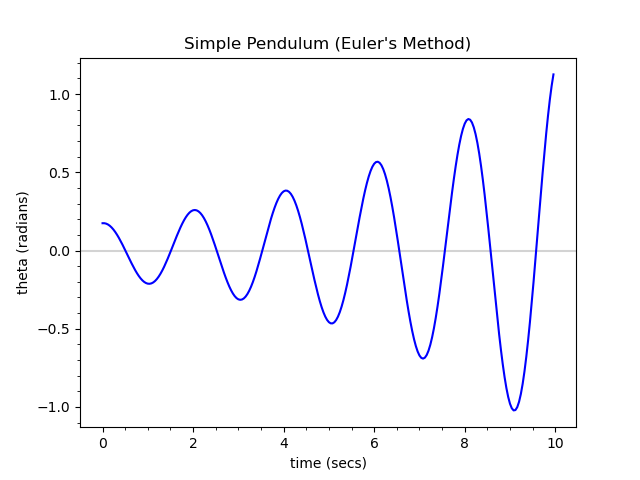

In [1]:
# euler_simple_pendulum.ipynb

# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from numpy.core.numeric import NaN

# Creating a variable but it is currently set to be Not a Number
phase_constant = NaN


def d_omega(omega, theta, time):
    return -phase_constant * theta


def d_theta(omega, theta, time):
    return omega


def euler(v1, v2, u, h, f1, f2):
    # Implements Euler's method
    # for linked ODEs (f1, f2), with two
    # dependent variables (v1, v2) and the
    # independent variable (u) having step size (h)
    next_v1 = v1 + f1(v1, v2, u) * h
    next_v2 = v2 + f2(v1, v2, u) * h
    u += h
    return next_v1, next_v2, u


def plot(ax):
    global phase_constant

    time_stop = 10  # seconds
    time_steps = 250
    delta_time = time_stop / time_steps

    omega_array = np.zeros(time_steps)
    theta_array = np.zeros(time_steps)
    time_array = np.zeros(time_steps)

    phase_constant = 9.81 / 1.0  # (m/s^2 = g / pendulum length)

    # Initializing arrays and declaring them as varibles to easily use later on
    omega_array[0] = 0  # angular velocity = 0 (released at rest)
    theta_array[0] = np.pi / 18  # 10 degrees (small angle)
    time_array[0] = 0  # set initial time value

    omega = omega_array[0]
    theta = theta_array[0]
    time = time_array[0]

    for step in range(1, time_steps):
        omega, theta, time = euler(omega, theta, time, delta_time, d_omega, d_theta)
        omega_array[step] = omega
        theta_array[step] = theta
        time_array[step] = time

    ax.set_title("Simple Pendulum (Euler's Method)")
    ax.set_xlabel("time (secs)")
    ax.set_ylabel("theta (radians)")

    ax.axhline(y=0.0, color="lightgray")

    ax.plot(time_array, theta_array, color="blue", linestyle="solid")

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()